## Import Data and libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/kellerdevin/Titanic/main/train.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/kellerdevin/Titanic/main/test.csv')

# EDA

In [3]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Age

Text(30, 90, 'median = 28.0')

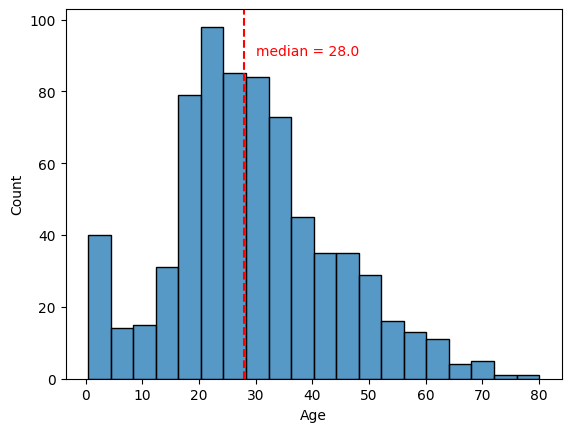

In [7]:
sns.histplot(train_data['Age'])
median = train_data['Age'].median()
plt.axvline(median, color = 'red', linestyle = '--')
plt.text(30,90, 'median = ' + str(median), color = 'red')

Text(30, 150, 'median = 14.4542')

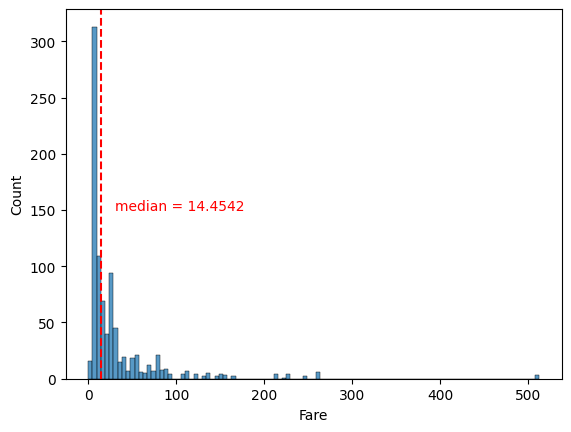

In [8]:
sns.histplot(train_data['Fare'])
median = train_data['Fare'].median()
plt.axvline(median, color = 'red', linestyle = '--')
plt.text(30,150, 'median = ' + str(median), color = 'red')

In [9]:
#Pie Chart
survive_counts = train_data['Survived'].value_counts()
print(survive_counts)

0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Survived')

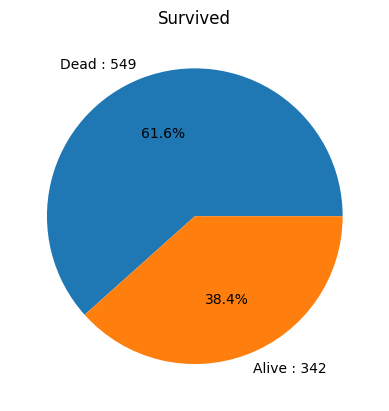

In [10]:
plt.pie(survive_counts,
        labels = [f'Dead : {survive_counts.values[0]}',
                  f'Alive : {survive_counts.values[1]}'],
        autopct='%1.1f%%')
plt.title('Survived')

## Sex

In [11]:
train_data['Sex'] = train_data['Sex'].astype('category')

In [12]:
sex_counts = train_data['Sex'].value_counts()
print(sex_counts)

male      577
female    314
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Sex')

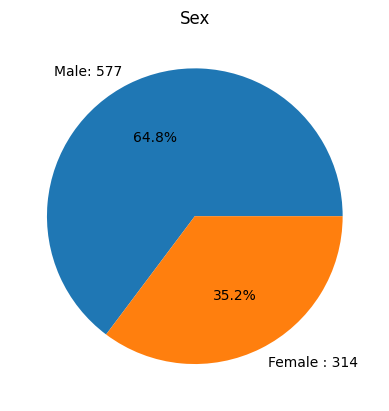

In [13]:
plt.pie(sex_counts,
        labels = [f'Male: {sex_counts.values[0]}',
                  f'Female : {sex_counts.values[1]}'],
        autopct = '%1.1f%%')

plt.title("Sex")

([<matplotlib.axis.XTick at 0x7fd75cbc3250>,
 [Text(0, 0, 'female'), Text(1, 0, 'male')])

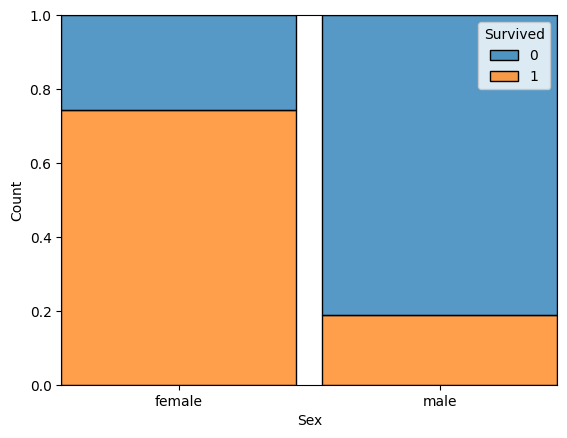

In [14]:
sns.histplot(data = train_data,
             x = 'Sex',
             hue = 'Survived',
             multiple = 'fill',
             shrink = 0.9)

plt.xticks([0,1])

## Class

In [15]:
train_data['Pclass'] = train_data['Pclass'].astype('category')

In [16]:
Pclass_counts = train_data['Pclass'].value_counts()

Text(0.5, 1.0, 'Socio-economic status')

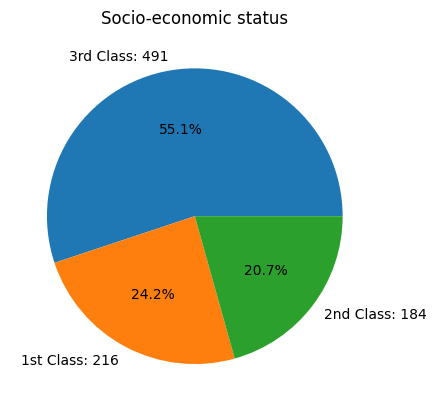

In [17]:
plt.pie(Pclass_counts,
        labels = [
            f'3rd Class: {Pclass_counts.values[0]}',
            f'1st Class: {Pclass_counts.values[1]}',
            f'2nd Class: {Pclass_counts.values[2]}'
            ],
        autopct = '%1.1f%%'
        )
plt.title("Socio-economic status")

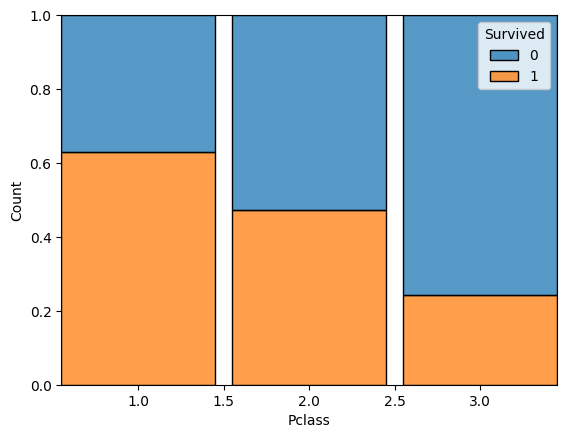

In [18]:
sns.histplot(data = train_data,
             x = 'Pclass',
             hue = 'Survived',
             multiple = 'fill',
             shrink = .9
)
plt.xticks = [0,1,2]

## Embarked

In [19]:
Embarked_counts = train_data['Embarked'].value_counts()
Embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Port of Embarkation')

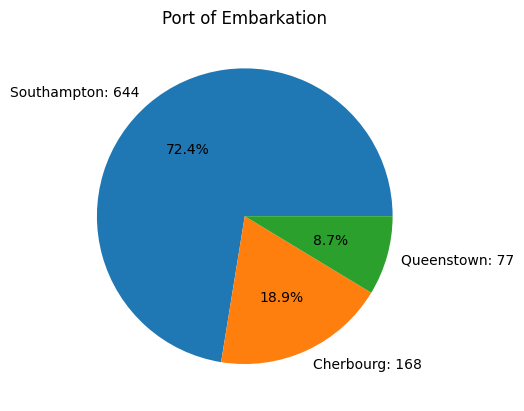

In [20]:
plt.pie(Embarked_counts,
        labels = [
            f'Southampton: {Embarked_counts.values[0]}',
            f'Cherbourg: {Embarked_counts.values[1]}',
            f'Queenstown: {Embarked_counts.values[2]}'
            ],
        autopct = '%1.1f%%'
        )
plt.title("Port of Embarkation")

<Axes: xlabel='Embarked', ylabel='Count'>

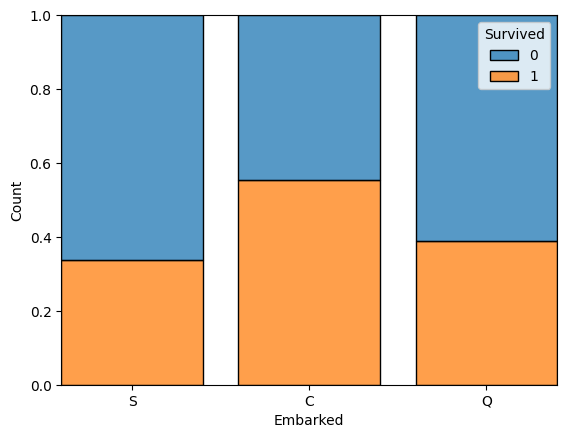

In [21]:
sns.histplot(data = train_data,
             x = 'Embarked',
             hue = 'Survived',
             shrink = .8,
             multiple = 'fill'
             )

## # of parents / children aboard the Titanic

Text(0.5, 0, '# of parents / children aboard the Titanic')

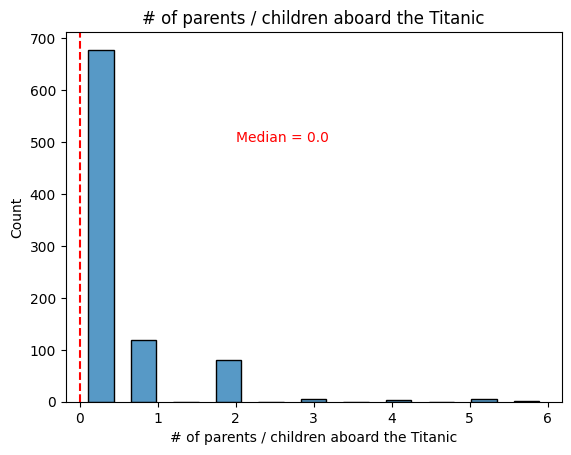

In [22]:
sns.histplot(data = train_data,
             x = 'Parch',
             shrink = .6)
median = train_data['Parch'].median()
plt.axvline(median, color = 'red', linestyle = '--')
plt.text(2,500, "Median = " + str(median), color = 'red')
plt.title('# of parents / children aboard the Titanic')
plt.xlabel('# of parents / children aboard the Titanic')

Text(0.5, 1.0, 'Survival by # of parents / children aboard the Titanic')

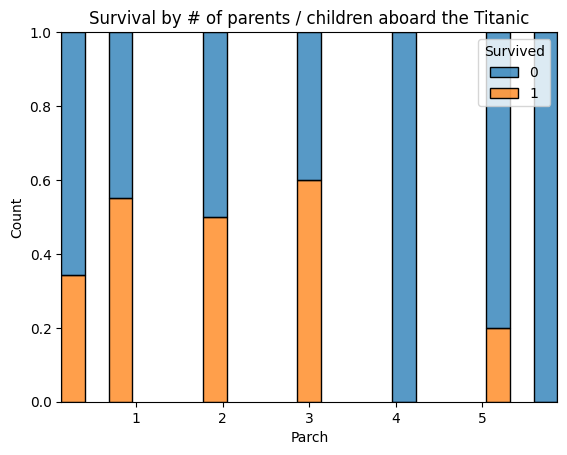

In [23]:
sns.histplot(data = train_data,
             x = 'Parch',
             hue = 'Survived',
             multiple = 'fill',
             shrink = .5)
plt.title('Survival by # of parents / children aboard the Titanic')

## # of siblings / spouses aboard the Titanic

<Axes: xlabel='SibSp', ylabel='Count'>

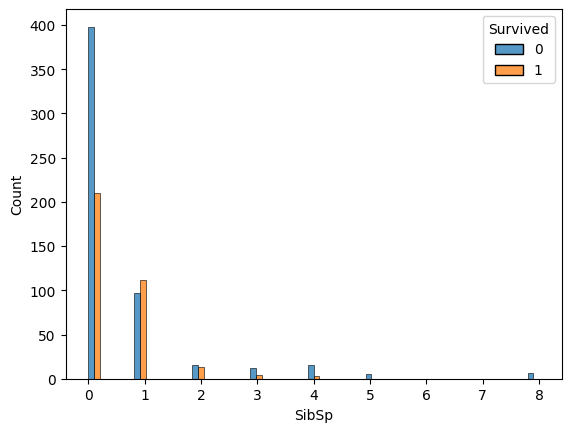

In [24]:
sns.histplot(data = train_data,
             x = 'SibSp',
             hue = 'Survived',
             multiple = 'dodge')


In [25]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handling Missing Values

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 71.7+ KB


In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


I want to keep age as a variable in this model. Because for this competetion we have to submit the prediction model's results with the same number of rows as there are in the test set, I cannot drop any rows. Because the majority of the rows include the age variable, for the rows that have NA in Age I will fill with the median age.

In [28]:
median_age = train_data['Age'].median()
train_data['Age'].fillna(median_age, inplace = True)
test_data['Age'].fillna(median_age, inplace = True)

In [29]:
test_data.loc[test_data['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
test_data.loc[test_data['PassengerId'] == 1044, 'Fare'] = 14.45

In [31]:
train_data['Embarked'].fillna(train_data['Embarked'].mode, inplace = True)

In [32]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 71.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-nu

(None, None)

## Feature Engineering

We now need to change Sex, PClass, Embarked to label encoded variables

In [33]:
label_encoder = LabelEncoder()

train_data['Sex_encoded'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex_encoded'] = label_encoder.fit_transform(test_data['Sex'])

train_data['Pclass_encoded'] = label_encoder.fit_transform(train_data['Pclass'])
test_data['Pclass_encoded'] = label_encoder.fit_transform(test_data['Pclass'])

For embarked I am going to use one hot encoding because it is non-ordinal

In [34]:
embarked_dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')

In [35]:
train_data = pd.concat([train_data, embarked_dummies], axis=1)

In [36]:
embarked_dummies = pd.get_dummies(test_data['Embarked'], prefix='Embarked')

In [37]:
test_data = pd.concat([test_data, embarked_dummies], axis=1)

In [38]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Pclass_encoded,"Embarked_<bound method Series.mode of 0 S\n1 C\n2 S\n3 S\n4 S\n ..\n886 S\n887 S\n888 S\n889 C\n890 Q\nName: Embarked, Length: 891, dtype: object>",Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,0,0,0,1


# Build Model

In [39]:
features = ['Pclass_encoded', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']

In [40]:
train_data[features].head(5)

,Pclass_encoded,Sex_encoded,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,2,1,22.0,1,0,7.2500,0,1
1,0,0,38.0,1,0,71.2833,0,0
2,2,0,26.0,0,0,7.9250,0,1
3,0,0,35.0,1,0,53.1000,0,1
4,2,1,35.0,0,0,8.0500,0,1


In [41]:
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

X_train.head(), X_test.head()  # Displaying the first few rows of the processed data

(   Pclass_encoded  Sex_encoded   Age  SibSp  Parch     Fare  Embarked_Q  \
 0               2            1  22.0      1      0   7.2500           0   
 1               0            0  38.0      1      0  71.2833           0   
 2               2            0  26.0      0      0   7.9250           0   
 3               0            0  35.0      1      0  53.1000           0   
 4               2            1  35.0      0      0   8.0500           0   
 
    Embarked_S  
 0           1  
 1           0  
 2           1  
 3           1  
 4           1  ,
    Pclass_encoded  Sex_encoded   Age  SibSp  Parch     Fare  Embarked_Q  \
 0               2            1  34.5      0      0   7.8292           1   
 1               2            0  47.0      1      0   7.0000           0   
 2               1            1  62.0      0      0   9.6875           1   
 3               2            1  27.0      0      0   8.6625           0   
 4               2            0  22.0      1      1  12.287

In [42]:
# Building the logistic regression model on the dataset with dropped rows
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, y_train)

# Evaluating the model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

cv_scores.mean(), cv_scores.std()

(0.7912497646098802, 0.018547221505865137)

Average Cross-Validation Accuracy: Approximately 79%
Standard Deviation of CV Scores: Approximately 1.85%

In [43]:
y_pred = model.predict(X_test)

Convert y_pred to DataFrame

In [44]:
predictions = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_pred
})

In [45]:
predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
result_file_path = 'predictions.csv'
predictions.to_csv(result_file_path, index=False)